In [1]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [3]:
pip install numpy==1.21

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.0/10.3 MB 660.6 kB/s eta 0:00:16
     ---------------------------------------- 0.1/10.3 MB 1.1 MB/s eta 0:00:10
      --------------------------------------- 0.2/10.3 MB 1.3 MB/s eta 0:00:08
      --------------------------------------- 0.2/10.3 MB 1.3 MB/s eta 0:00:08
      -------------------------------------- 0.2/10.3 MB 981.9 kB/s eta 0:00:11
     - ------------------------------------- 0.3/10.3 MB 983.9 kB/s eta 0:00:11
     - ------------------------------------- 0.3/10.3 MB 983.9 kB/s eta 0:00:11
     - ------------------------------------- 0.4/10.3 MB 969.8 kB/s eta 0:00:11
     - ------------------------------------- 0.4/10.3 MB 983.6 kB/s eta 0:00:11
     - ------------------------------------- 0.4/10.3 MB 994.9 kB/s eta 0:00:10
     - ------------------------------------- 0.5/10.3 MB 930.9 kB/s eta 0:00:11
     - ------------------------------------- 0.5/10

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [206 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.0 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\yenug\\anaconda3\\lib', 'C:\\', 'C:\\Users\\yenug\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\y

In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


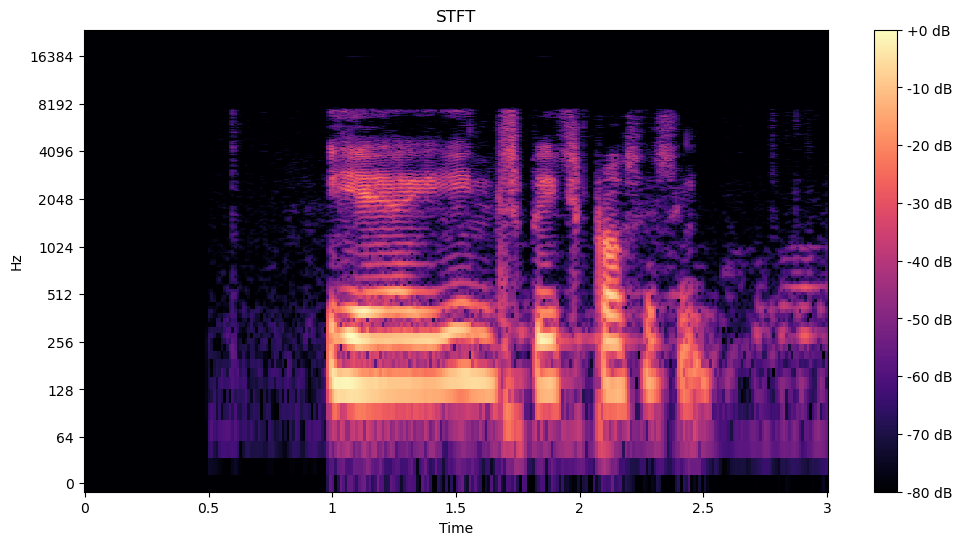

C:\Users\yenug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


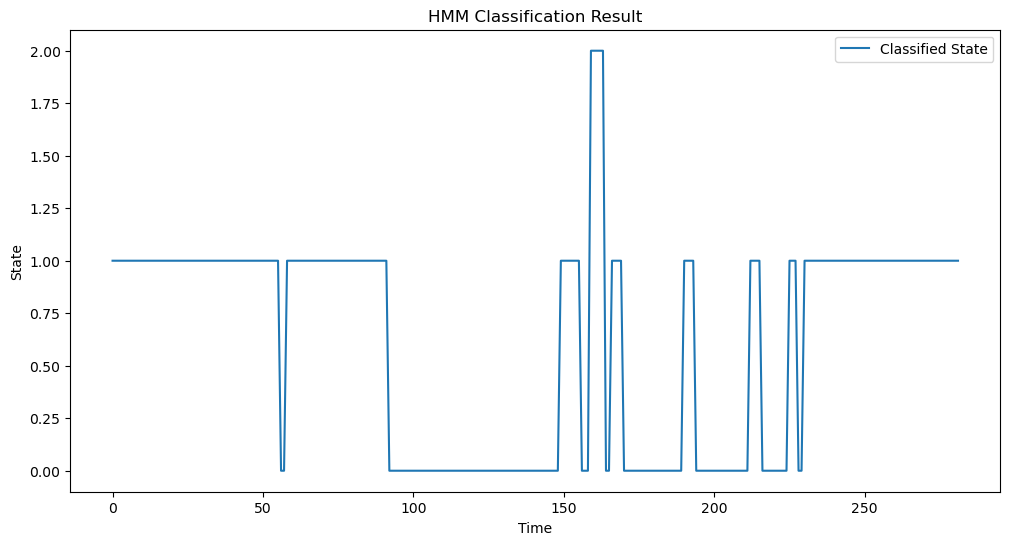

HMM Model Parameters:
Transition Matrix:
[[0.92920354 0.0619469  0.00884956]
 [0.04294479 0.95705521 0.        ]
 [0.2        0.         0.8       ]]
Means:
[[7.27549745e-02 1.75356211e-01 6.05583932e-01 ... 2.22988595e-04
  2.31420895e-04 1.73829718e-04]
 [8.47794571e-03 3.59002888e-02 1.63276337e-01 ... 1.81225823e-04
  1.67936985e-04 1.66701371e-04]
 [9.32757735e-02 3.36976039e-01 1.52294804e+00 ... 2.67068326e-04
  2.95239413e-04 2.08933611e-04]]
Covariances:
[[[3.86053173e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.42041363e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.29433746e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.85092144e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   8.85083036e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = "lab@omkar-[AudioTrimmer.com].wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()